In [3]:
import numpy as np
import pandas as pd
import re

from sklearn.model_selection import train_test_split

In [17]:
df = pd.read_csv('SolarPrediction.csv')
df.head()

UNIXTime                   Data      Time  Radiation  Temperature  \
0  1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
1  1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
2  1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
3  1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
4  1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   

   Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  
0     30.46        59                  177.39   5.62    06:13:00   18:13:00  
1     30.46        58                  176.78   3.37    06:13:00   18:13:00  
2     30.46        57                  158.75   3.37    06:13:00   18:13:00  
3     30.46        60                  137.71   3.37    06:13:00   18:13:00  
4     30.46        62                  104.95   5.62    06:13:00   18:13:00

In [18]:
df['month'] = df['Data'].apply(lambda x : re.search(r'^\d+', x).group(0)).astype(int)
df['date'] = df['Data'].apply(lambda x : re.search(r'(?<=\/)\d+(?=\/)', x).group(0)).astype(int)
df['year'] = df['Data'].apply(lambda x : re.search(r'(?<=\/)\d+(?=\s)', x).group(0)).astype(int)
df['hour'] = df['Time'].apply(lambda x : re.search(r'^\d+', x).group(0)).astype(int)
df['minute'] = df['Time'].apply(lambda x : re.search(r'(?<=\:)\d+(?=\:)', x).group(0)).astype(int)
df['second'] = df['Time'].apply(lambda x : re.search(r'\d+$', x).group(0)).astype(int)
df['risehour'] = df['TimeSunRise'].apply(lambda x : re.search(r'^\d+', x).group(0)).astype(int)
df['riseminuter'] = df['TimeSunRise'].apply(lambda x : re.search(r'(?<=\:)\d+(?=\:)', x).group(0)).astype(int)
df['sethour'] = df['TimeSunSet'].apply(lambda x : re.search(r'^\d+', x).group(0)).astype(int)
df['setminute'] = df['TimeSunSet'].apply(lambda x : re.search(r'(?<=\:)\d+(?=\:)', x).group(0)).astype(int)
df.drop(['Data', 'Time', 'TimeSunRise', 'TimeSunSet'], axis = 1, inplace = True)

In [6]:
df.sample(10)

UNIXTime  Radiation  Temperature  Pressure  Humidity  \
9551   1477352420     914.08           57     30.42        81   
24481  1478006718       1.22           44     30.44        95   
6781   1472929502     683.91           60     30.45        82   
9209   1477455318       1.26           54     30.43        94   
25405  1482998442       1.17           40     30.38        96   
27201  1482459649     333.70           55     30.41        79   
27443  1482386749       1.23           47     30.42        40   
2941   1474326605    1053.66           66     30.43        27   
26953  1482534039     842.69           58     30.44        64   
3945   1473942304       1.24           50     30.43       100   

       WindDirection(Degrees)  Speed  month  date  year  hour  minute  second  \
9551                    60.05   1.12     10    24  2016    13      40      20   
24481                  157.78   9.00     11     1  2016     3      25      18   
6781                   307.37   4.50      9     3  2016     9       5       2   
9209                   231.02   3.37     10    25  2016    18      15      18   
25405                  154.71   5.62     12    28  2016    22       0      42   
27201                   63.51   3.37     12    22  2016    16      20      49   
27443                   80.76   7.87     12    21  2016    20       5      49   
2941                    36.49   6.75      9    19  2016    13      10       5   
26953                  353.61  10.12     12    23  2016    13       0      39   
3945                   230.27   4.50      9    15  2016     2      25       4   

       risehour  riseminuter  sethour  setminute  
9551          6           21       17         53  
24481         6           24       17         48  
6781          6            8       18         36  
9209          6           21       17         52  
25405         6           56       17         52  
27201         6           53       17         49  
27443         6           53       17         49  
2941          6           11       18         22  
26953         6           54       17         50  
3945          6           10       18         26

In [7]:
df.describe()

UNIXTime     Radiation   Temperature      Pressure      Humidity  \
count  3.268600e+04  32686.000000  32686.000000  32686.000000  32686.000000   
mean   1.478047e+09    207.124697     51.103255     30.422879     75.016307   
std    3.005037e+06    315.916387      6.201157      0.054673     25.990219   
min    1.472724e+09      1.110000     34.000000     30.190000      8.000000   
25%    1.475546e+09      1.230000     46.000000     30.400000     56.000000   
50%    1.478026e+09      2.660000     50.000000     30.430000     85.000000   
75%    1.480480e+09    354.235000     55.000000     30.460000     97.000000   
max    1.483265e+09   1601.260000     71.000000     30.560000    103.000000   

       WindDirection(Degrees)         Speed         month          date  \
count            32686.000000  32686.000000  32686.000000  32686.000000   
mean               143.489821      6.243869     10.526066     15.825766   
std                 83.167500      3.490474      1.096691      8.711824   
min                  0.090000      0.000000      9.000000      1.000000   
25%                 82.227500      3.370000     10.000000      9.000000   
50%                147.700000      5.620000     11.000000     16.000000   
75%                179.310000      7.870000     11.000000     23.000000   
max                359.950000     40.500000     12.000000     31.000000   

          year          hour        minute        second  risehour  \
count  32686.0  32686.000000  32686.000000  32686.000000   32686.0   
mean    2016.0     11.557425     27.556691     17.441902       6.0   
std        0.0      6.912034     17.268507     12.951109       0.0   
min     2016.0      0.000000      0.000000      0.000000       6.0   
25%     2016.0      6.000000     15.000000      5.000000       6.0   
50%     2016.0     12.000000     30.000000     18.000000       6.0   
75%     2016.0     18.000000     45.000000     22.000000       6.0   
max     2016.0     23.000000     57.000000     59.000000       6.0   

        riseminuter       sethour     setminute  
count  32686.000000  32686.000000  32686.000000  
mean      27.640519     17.347886     37.317904  
std       15.518714      0.476307     15.938416  
min        7.000000     17.000000      0.000000  
25%       14.000000     17.000000     26.000000  
50%       24.000000     17.000000     43.000000  
75%       40.000000     18.000000     48.000000  
max       57.000000     18.000000     59.000000

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn')

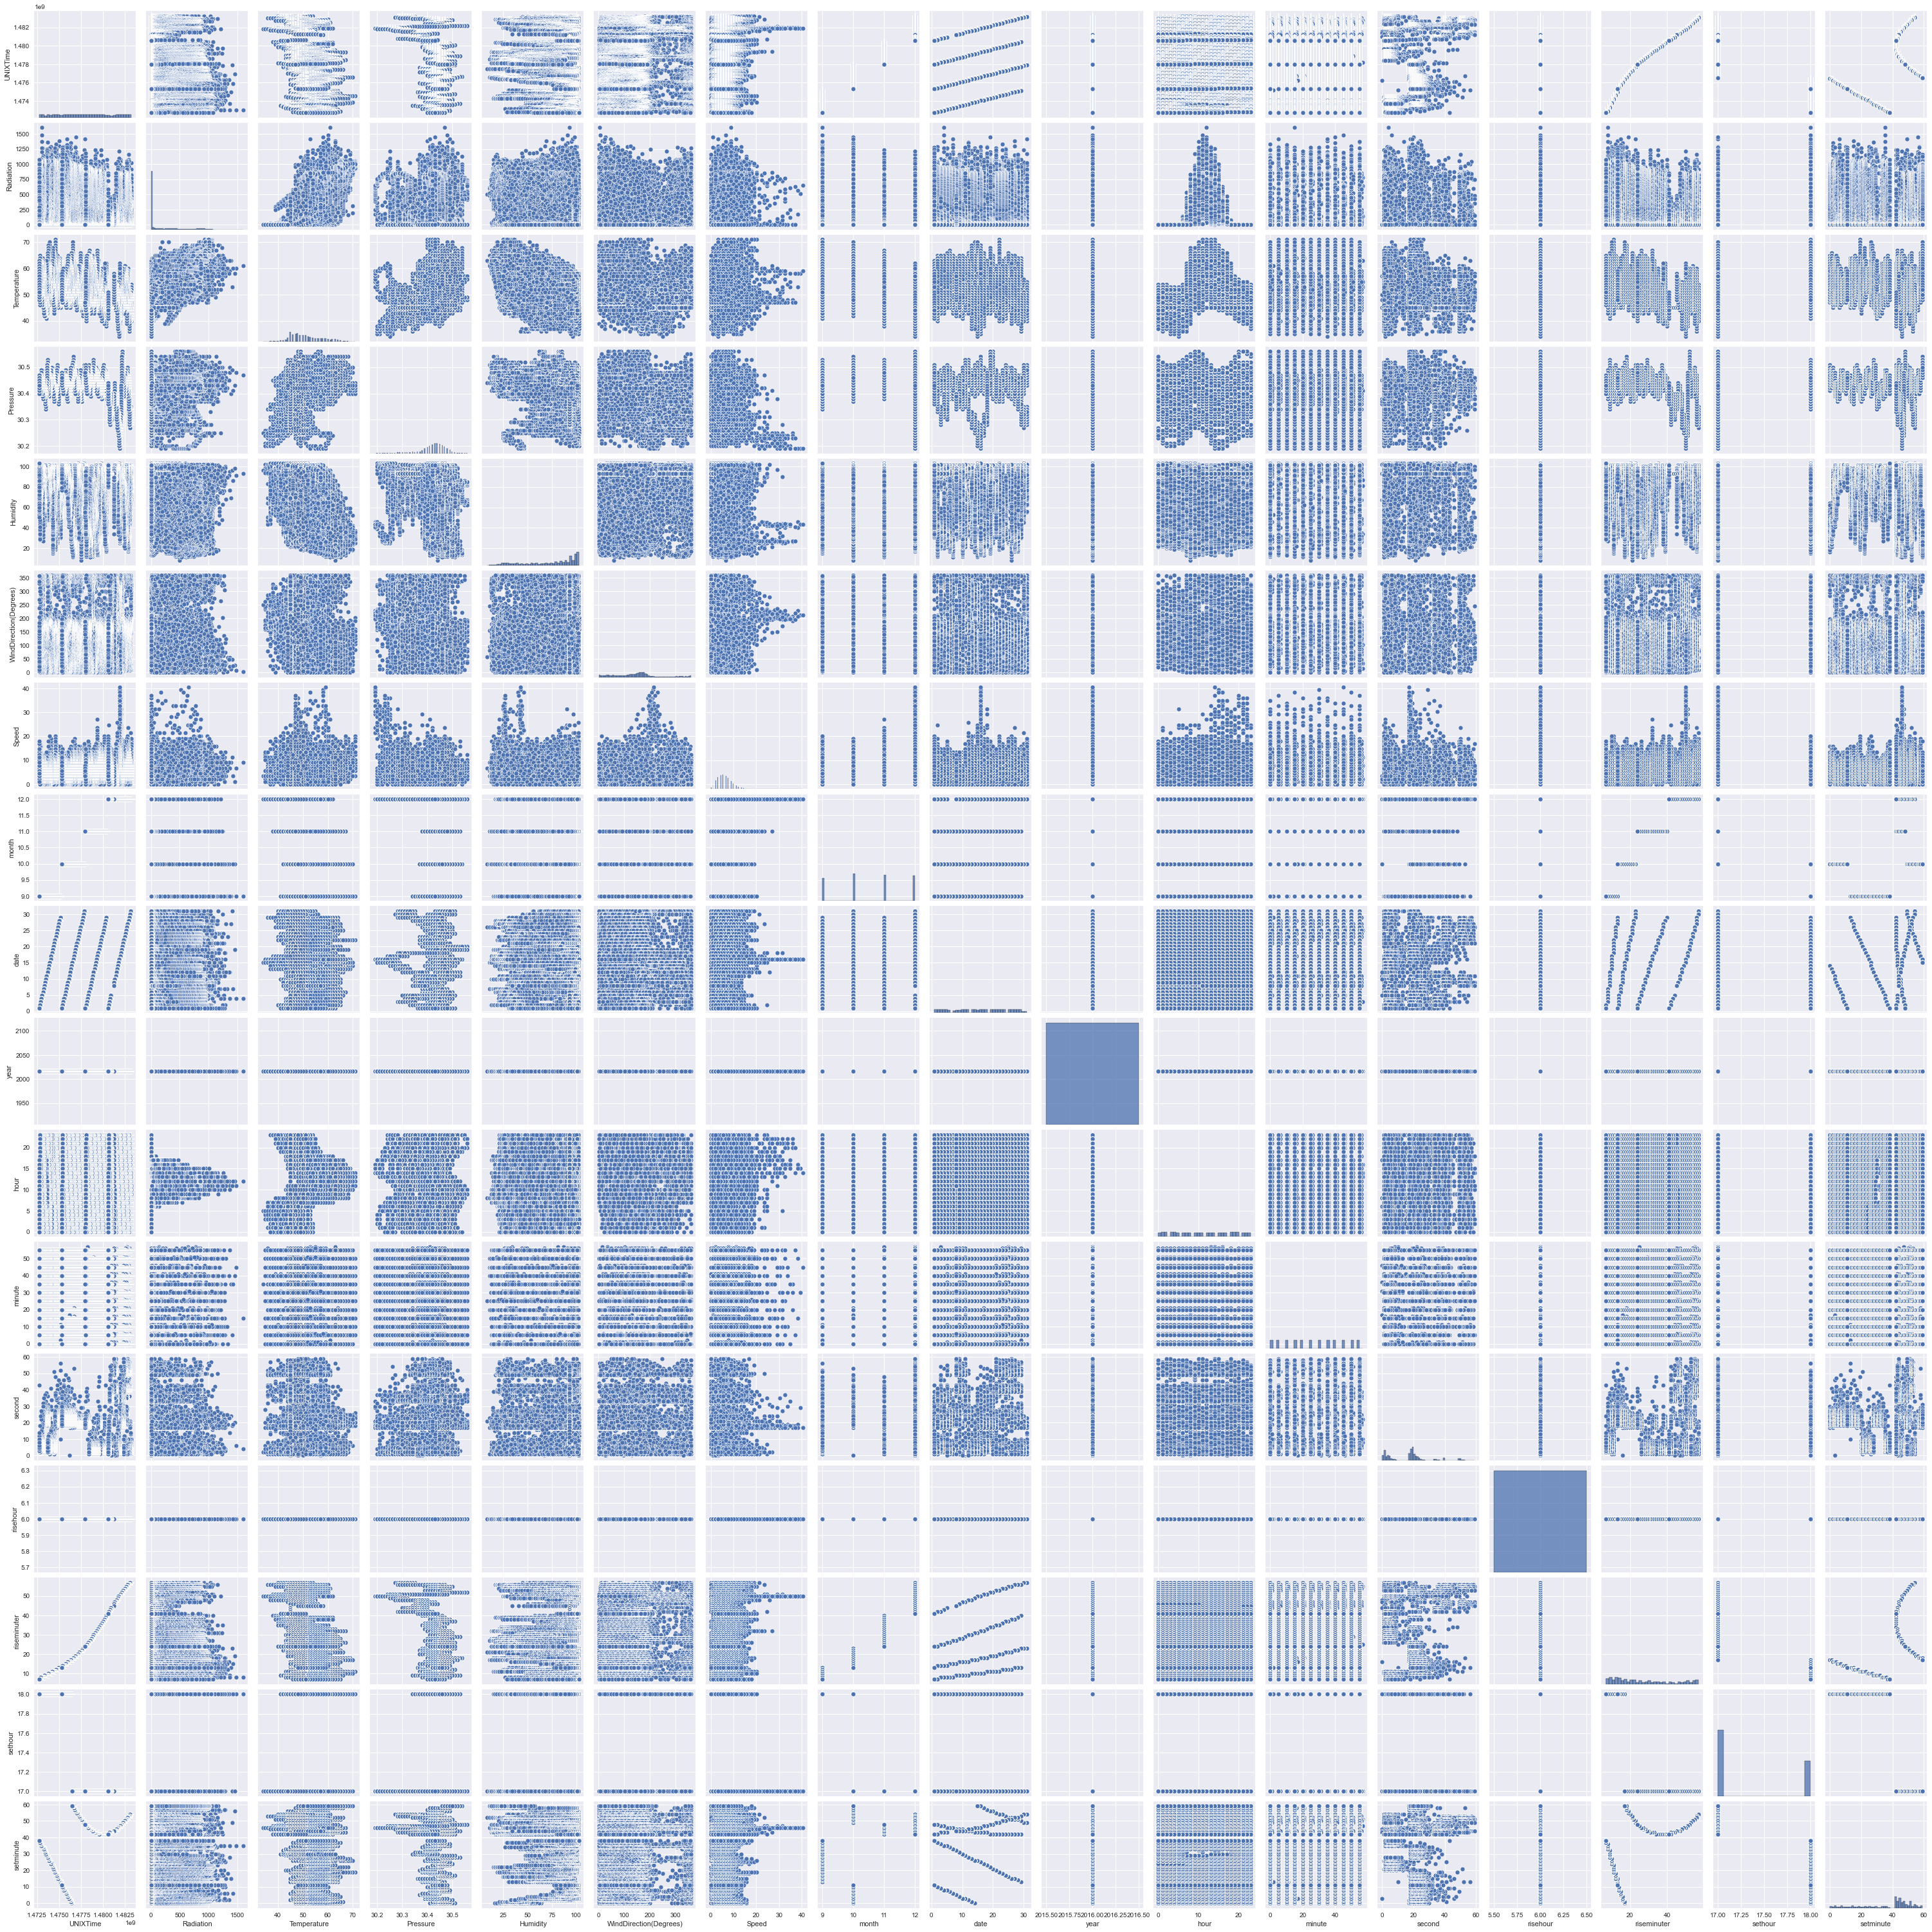

In [13]:
sns.pairplot(df)

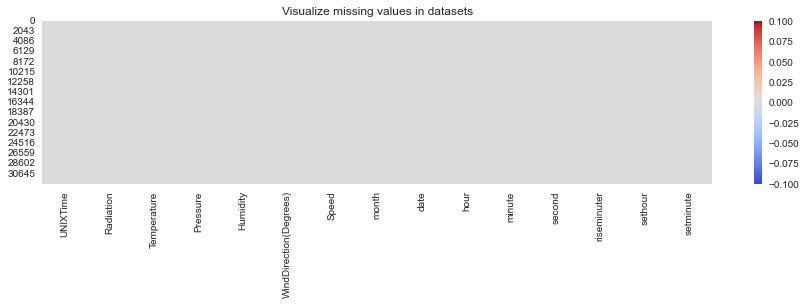

In [18]:
plt.figure(figsize=(15, 3))
sns.heatmap(df.isnull(), cmap='coolwarm');
plt.title('Visualize missing values in datasets');

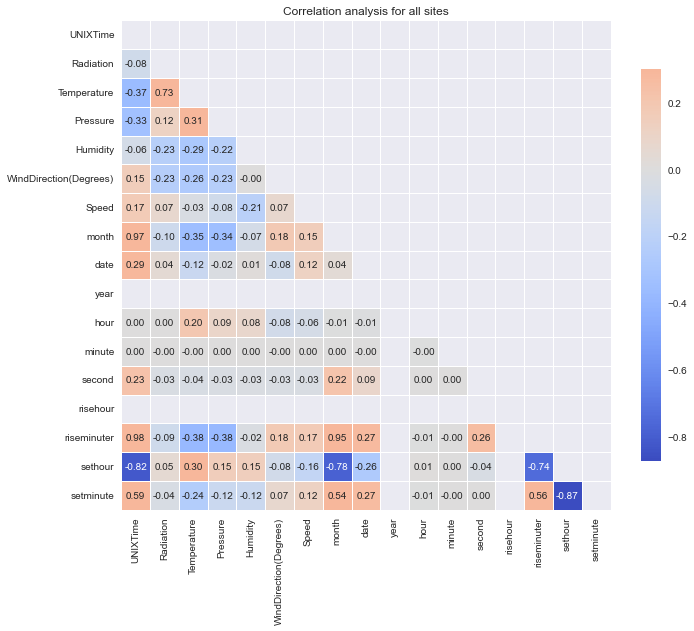

In [16]:
df_corr = df[['UNIXTime','Radiation','Temperature','Pressure','Humidity',
              'WindDirection(Degrees)','Speed','month','date','year',
              'hour','minute','second','risehour','riseminuter','sethour','setminute']].corr()
mask = np.triu(np.ones_like(df_corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_corr, mask=mask, cmap='coolwarm', vmax=.3, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation analysis for all sites')
plt.show()

In [9]:
df.drop(['year', 'risehour','UNIXTime'], axis = 1, inplace = True)
df.head()

Radiation  Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed  \
0       1.21           48     30.46        59                  177.39   5.62   
1       1.21           48     30.46        58                  176.78   3.37   
2       1.23           48     30.46        57                  158.75   3.37   
3       1.21           48     30.46        60                  137.71   3.37   
4       1.17           48     30.46        62                  104.95   5.62   

   month  date  hour  minute  second  riseminuter  sethour  setminute  
0      9    29    23      55      26           13       18         13  
1      9    29    23      50      23           13       18         13  
2      9    29    23      45      26           13       18         13  
3      9    29    23      40      21           13       18         13  
4      9    29    23      35      24           13       18         13

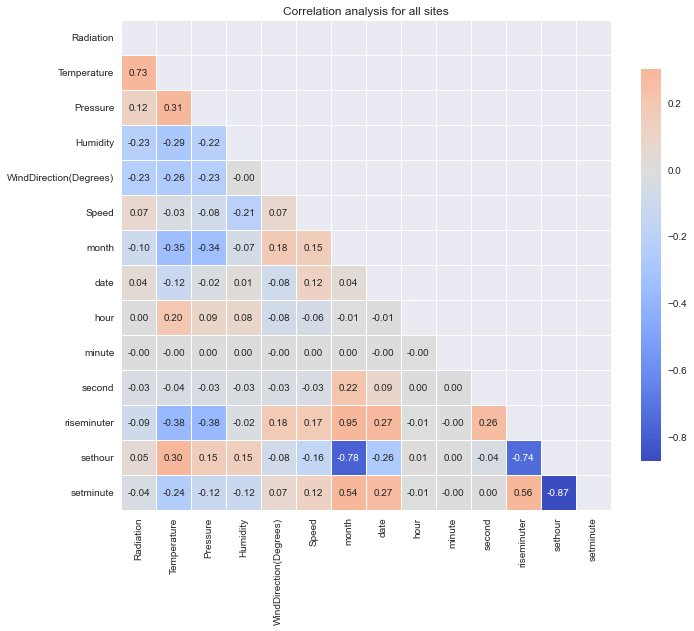

In [28]:
df_corr = df[['Radiation','Temperature','Pressure','Humidity',
              'WindDirection(Degrees)','Speed','month','date',
              'hour','minute','second','riseminuter','sethour','setminute']].corr()
mask = np.triu(np.ones_like(df_corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_corr, mask=mask, cmap='coolwarm', vmax=.3, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation analysis for all sites')
plt.show()

In [19]:
df['delta_hr']= df.hour - min(df.hour)
df['sine_hr']= np.sin(2*(df.delta_hr*np.pi/(max(df.hour) - min(df.hour))))
df['cos_hr']= np.cos(2*(df.delta_hr*np.pi/(max(df.hour) - min(df.hour))))

In [57]:
df.sample(10)

Radiation  Temperature  Pressure  Humidity  WindDirection(Degrees)  \
6505      379.77           57     30.47        95                   31.62   
4061      155.67           55     30.40        99                  314.55   
28260       1.23           46     30.47        85                  177.85   
15326       1.25           49     30.42        93                  182.41   
18227       1.21           43     30.44       101                  128.80   
1066        1.22           45     30.41        60                  173.61   
15534     287.07           54     30.46       101                   40.16   
20191       1.22           46     30.46        29                  159.97   
19604       1.18           47     30.43        25                  149.34   
17059       1.20           44     30.49        50                   51.61   

       Speed  month  date  hour  minute  second  riseminuter  sethour  \
6505    2.25      9     4     8      40       3            8       18   
4061    2.25      9    14    16      25       9           10       18   
28260   1.12     12    18    23      50      17           51       17   
15326   4.50     10     4     5      45      20           14       18   
18227   2.25     11    22    21       5       2           35       17   
1066    5.62      9    26     3      50      23           12       18   
15534   7.87     10     3    11      40      20           14       18   
20191  10.12     11    16     1      20       4           32       17   
19604   5.62     11    18     2      15      17           33       17   
17059   3.37     11    26    22      40      18           38       17   

       setminute  delta_hr      sine_mon   cos_mon       sine_hr    cos_hr  
6505          35         8  7.557496e-01 -0.654861  8.878852e-01  0.460065  
4061          26        16  7.557496e-01 -0.654861  8.169699e-01 -0.576680  
28260         47        23  5.665539e-16 -1.000000  1.224647e-16 -1.000000  
15326          8         5  5.406408e-01 -0.841254  6.310879e-01  0.775711  
18227         42        21  2.817326e-01 -0.959493  2.697968e-01 -0.962917  
1066          15         3  7.557496e-01 -0.654861  3.984011e-01  0.917211  
15534          9        11  5.406408e-01 -0.841254  9.976688e-01  0.068242  
20191         43         1  2.817326e-01 -0.959493  1.361666e-01  0.990686  
19604         43         2  2.817326e-01 -0.959493  2.697968e-01  0.962917  
17059         42        22  2.817326e-01 -0.959493  1.361666e-01 -0.990686

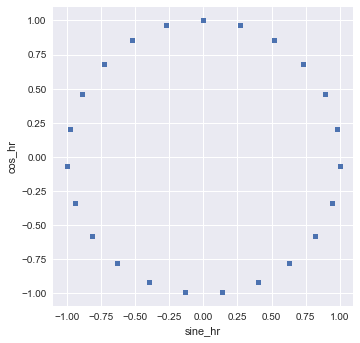

In [20]:
ax = df.plot.scatter('sine_hr', 'cos_hr').set_aspect('equal')

In [21]:
select= ['Temperature','Pressure','Humidity','WindDirection(Degrees)','Speed',
         'riseminuter','sethour','setminute', 'sine_hr','cos_hr']
df_select = df[select].reset_index(drop=True)
df_select.sample(5)

Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed  \
1927            51     30.42        90                  141.08   1.12   
7940            48     30.40       102                   92.03   5.62   
28156           49     30.52        90                  130.72   7.87   
14338           51     30.40       100                  301.32   0.00   
330             52     30.41        67                  122.69   6.75   

       riseminuter  sethour  setminute   sine_hr    cos_hr  
1927            12       18         18  0.730836  0.682553  
7940            23       17         49  0.887885  0.460065  
28156           52       17         48  0.816970 -0.576680  
14338           15       18          6 -0.997669 -0.068242  
330             13       18         14 -0.730836  0.682553

In [22]:
target_label = 'Radiation'
features = list(set(select).difference(set([target_label])))
features

['riseminuter',
 'setminute',
 'Humidity',
 'cos_hr',
 'Pressure',
 'Temperature',
 'Speed',
 'WindDirection(Degrees)',
 'sine_hr',
 'sethour']

In [23]:
X = df_select[features].reset_index(drop=True)
y = df[target_label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Hyperparameter

In [24]:
n_estimators_list = [int(50*x) for x in range(2, 30)]

learning_rate_list = [round(x/500, 4) for x in range(2, 25)]

max_depth_list = [int(x) for x in range(3, 13)]
max_depth_list.append(-1)

n_leaves_list = [int(50*x) for x in range(2, 30)]

feature_fraction_list = [x/10 for x in range(1, 10)]

objective_list = ['rmse', 'mae', 'mape'] 

Graident Boosting

In [51]:
import optuna
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

In [ ]:
def objective(trial):
    # Define the hyperparameters to optimize
    params = {
        'n_estimators': trial.suggest_categorical('n_estimators', n_estimators_list),
        'learning_rate': trial.suggest_categorical('learning_rate', learning_rate_list),
        'max_depth': trial.suggest_categorical('max_depth', max_depth_list),
        'num_leaves': trial.suggest_categorical('num_leaves', n_leaves_list),
        'feature_fraction': trial.suggest_categorical('feature_fraction', feature_fraction_list),
        'objective': trial.suggest_categorical('objective', objective_list),
        'random_state': 42
    }

    # Train the LightGBM model with the hyperparameters
    model = lgb.LGBMRegressor(**params)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the evaluation metric (RMSE in this case)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    return rmse

# Create a study object
study = optuna.create_study(direction='minimize')

# Optimize the objective function
study.optimize(objective, n_trials=100)

In [54]:
print('Best parameters:', study.best_params)
print('Best value:', study.best_value)
print('Best trial: ',study.best_trials)

Best parameters: {'n_estimators': 800, 'learning_rate': 0.008, 'max_depth': 12, 'num_leaves': 1200, 'feature_fraction': 0.6, 'objective': 'rmse'}
Best value: 85.06239294259767
Best trial:  [FrozenTrial(number=60, state=TrialState.COMPLETE, values=[85.06239294259767], datetime_start=datetime.datetime(2023, 7, 17, 13, 36, 53, 576720), datetime_complete=datetime.datetime(2023, 7, 17, 13, 37, 2, 44338), params={'n_estimators': 800, 'learning_rate': 0.008, 'max_depth': 12, 'num_leaves': 1200, 'feature_fraction': 0.6, 'objective': 'rmse'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': CategoricalDistribution(choices=(100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450)), 'learning_rate': CategoricalDistribution(choices=(0.004, 0.006, 0.008, 0.01, 0.012, 0.014, 0.016, 0.018, 0.02, 0.022, 0.024, 0.026, 0.028, 0.03, 0.032, 0.034, 0.036, 0.038, 0.04, 0.042, 0.

In [ ]:
import pickle
import joblib

# Save the best parameters to a file
with open('best_lgbm.pkl', 'wb') as f:
    pickle.dump(study.best_params, f)

# Load the best parameters from the file
with open('best_lgbm.pkl', 'rb') as f:
    best = pickle.load(f)

# Retrieve the best parameters from the study
best_params = best

# Create and train a model using the best parameters
model = lgb.LGBMRegressor(**best_params)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the evaluation metric (RMSE in this case)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("rmse : ",rmse)

# Save the trained model to a file
joblib.dump(model, 'lgbm_model.pkl')

Xgboosting

In [26]:
import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [39]:
# Define the objective function for Optuna optimization
def objective(trial):
    # Define the hyperparameters to optimize
    params = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 1500),
            'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.5),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'num_leaves': trial.suggest_int('num_leaves', 10, 500),
            'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
            'objective': 'reg:squarederror'  # Set the objective function for regression
        }

    # Train the XGBoost model with the hyperparameters
    model = xgb.XGBRegressor(**params)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the evaluation metric (RMSE in this case)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    return rmse

# Create a study object
study = optuna.create_study(direction='minimize')

# Optimize the objective function
study.optimize(objective, n_trials=10)

[I 2023-07-17 14:38:55,811] A new study created in memory with name: no-name-f8885e62-c0a5-4954-8875-db0808e7200d
C:\Users\Hp\AppData\Local\Temp\ipykernel_15724\1091216673.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.5),
C:\Users\Hp\AppData\Local\Temp\ipykernel_15724\1091216673.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[14:38:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_leaves" } are not used.



[I 2023-07-17 14:39:16,189] Trial 0 finished with value: 90.91583994801628 and parameters: {'n_estimators': 1410, 'learning_rate': 0.3781485319387727, 'max_depth': 8, 'num_leaves': 356, 'colsample_bytree': 0.8660064964866494}. Best is trial 0 with value: 90.91583994801628.
C:\Users\Hp\AppData\Local\Temp\ipykernel_15724\1091216673.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.5),
C:\Users\Hp\AppData\Local\Temp\ipykernel_15724\1091216673.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[14:39:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_leaves" } are not used.



[I 2023-07-17 14:39:22,657] Trial 1 finished with value: 91.21009998234881 and parameters: {'n_estimators': 843, 'learning_rate': 0.3964470533270389, 'max_depth': 4, 'num_leaves': 53, 'colsample_bytree': 0.8684907012227724}. Best is trial 0 with value: 90.91583994801628.
C:\Users\Hp\AppData\Local\Temp\ipykernel_15724\1091216673.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.5),
C:\Users\Hp\AppData\Local\Temp\ipykernel_15724\1091216673.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[14:39:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_leaves" } are not used.



[I 2023-07-17 14:39:26,730] Trial 2 finished with value: 94.57235352033157 and parameters: {'n_estimators': 750, 'learning_rate': 0.0738756980856106, 'max_depth': 3, 'num_leaves': 55, 'colsample_bytree': 0.825879923543569}. Best is trial 0 with value: 90.91583994801628.
C:\Users\Hp\AppData\Local\Temp\ipykernel_15724\1091216673.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.5),
C:\Users\Hp\AppData\Local\Temp\ipykernel_15724\1091216673.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[14:39:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_leaves" } are not used.



[I 2023-07-17 14:39:29,271] Trial 3 finished with value: 92.22326005024811 and parameters: {'n_estimators': 514, 'learning_rate': 0.3650097583483597, 'max_depth': 3, 'num_leaves': 246, 'colsample_bytree': 0.6108858458374538}. Best is trial 0 with value: 90.91583994801628.
C:\Users\Hp\AppData\Local\Temp\ipykernel_15724\1091216673.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.5),
C:\Users\Hp\AppData\Local\Temp\ipykernel_15724\1091216673.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[14:39:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_leaves" } are not used.



[I 2023-07-17 14:39:31,921] Trial 4 finished with value: 90.27084724877936 and parameters: {'n_estimators': 357, 'learning_rate': 0.334115689906301, 'max_depth': 4, 'num_leaves': 58, 'colsample_bytree': 0.8646617979713178}. Best is trial 4 with value: 90.27084724877936.
C:\Users\Hp\AppData\Local\Temp\ipykernel_15724\1091216673.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.5),
C:\Users\Hp\AppData\Local\Temp\ipykernel_15724\1091216673.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[14:39:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_leaves" } are not used.



[I 2023-07-17 14:39:34,816] Trial 5 finished with value: 91.90473629490715 and parameters: {'n_estimators': 510, 'learning_rate': 0.3333757898764977, 'max_depth': 3, 'num_leaves': 357, 'colsample_bytree': 0.9743442659869409}. Best is trial 4 with value: 90.27084724877936.
C:\Users\Hp\AppData\Local\Temp\ipykernel_15724\1091216673.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.5),
C:\Users\Hp\AppData\Local\Temp\ipykernel_15724\1091216673.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[14:39:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_leaves" } are not used.



[I 2023-07-17 14:39:42,758] Trial 6 finished with value: 91.60843162909606 and parameters: {'n_estimators': 451, 'learning_rate': 0.26342293898429736, 'max_depth': 10, 'num_leaves': 61, 'colsample_bytree': 0.6441193185726665}. Best is trial 4 with value: 90.27084724877936.
C:\Users\Hp\AppData\Local\Temp\ipykernel_15724\1091216673.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.5),
C:\Users\Hp\AppData\Local\Temp\ipykernel_15724\1091216673.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[14:39:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_leaves" } are not used.



[I 2023-07-17 14:39:45,034] Trial 7 finished with value: 91.08629064065603 and parameters: {'n_estimators': 258, 'learning_rate': 0.3858813430230107, 'max_depth': 5, 'num_leaves': 48, 'colsample_bytree': 0.6501020988869337}. Best is trial 4 with value: 90.27084724877936.
C:\Users\Hp\AppData\Local\Temp\ipykernel_15724\1091216673.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.5),
C:\Users\Hp\AppData\Local\Temp\ipykernel_15724\1091216673.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[14:39:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_leaves" } are not used.



[I 2023-07-17 14:40:05,522] Trial 8 finished with value: 93.36112058945514 and parameters: {'n_estimators': 1304, 'learning_rate': 0.4662134859735353, 'max_depth': 8, 'num_leaves': 360, 'colsample_bytree': 0.9671664656561563}. Best is trial 4 with value: 90.27084724877936.
C:\Users\Hp\AppData\Local\Temp\ipykernel_15724\1091216673.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.5),
C:\Users\Hp\AppData\Local\Temp\ipykernel_15724\1091216673.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[14:40:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_leaves" } are not used.



[I 2023-07-17 14:40:33,313] Trial 9 finished with value: 88.32441092603696 and parameters: {'n_estimators': 1439, 'learning_rate': 0.13906420929169686, 'max_depth': 10, 'num_leaves': 434, 'colsample_bytree': 0.875729199366043}. Best is trial 9 with value: 88.32441092603696.


In [40]:
print('Best parameters:', study.best_params)
print('Best value:', study.best_value)
print('Best trial: ',study.best_trials)

Best parameters: {'n_estimators': 1439, 'learning_rate': 0.13906420929169686, 'max_depth': 10, 'num_leaves': 434, 'colsample_bytree': 0.875729199366043}
Best value: 88.32441092603696
Best trial:  [FrozenTrial(number=9, state=TrialState.COMPLETE, values=[88.32441092603696], datetime_start=datetime.datetime(2023, 7, 17, 14, 40, 5, 523073), datetime_complete=datetime.datetime(2023, 7, 17, 14, 40, 33, 312684), params={'n_estimators': 1439, 'learning_rate': 0.13906420929169686, 'max_depth': 10, 'num_leaves': 434, 'colsample_bytree': 0.875729199366043}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=1500, log=False, low=100, step=1), 'learning_rate': FloatDistribution(high=0.5, log=False, low=0.01, step=None), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'num_leaves': IntDistribution(high=500, log=False, low=10, step=1), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.5, step=None)}, trial_id=9,

In [42]:
import pickle
import joblib

# Save the best parameters to a file
with open('best_xgb.pkl', 'wb') as f:
    pickle.dump(study.best_params, f)

# Load the best parameters from the file
with open('best_xgb.pkl', 'rb') as f:
    best = pickle.load(f)

# Retrieve the best parameters from the study
best_params = best

# Create and train a model using the best parameters
model = xgb.XGBRegressor(**best_params)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the evaluation metric (RMSE in this case)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("rmse : ",rmse)

# Save the trained model to a file
joblib.dump(model, 'xgb_model.pkl')

[14:42:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_leaves" } are not used.

rmse :  88.32441092603696


['xgb_model.pkl']